# Clustering of Mouse and Human classified V1 neurons

In [1]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import scanpy as sc

# Mouse Clustering

In [2]:
# Import mouse annotations
mouse_annotation = sc.read_h5ad("data/annotated_data/mouse_neurons_rpca_xgb.h5ad")
mouse_annotation

AnnData object with n_obs × n_vars = 11138 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'RNA_snn_res.2', 'seurat_clusters', 'training_labels', 'citeseq', 'annotation', 'labels_xgb', 'labels_svm', 'v1'
    var: 'vf_vst_counts.BOUV5_mean', 'vf_vst_counts.BOUV5_variance', 'vf_vst_counts.BOUV5_variance.expected', 'vf_vst_counts.BOUV5_variance.standardized', 'vf_vst_counts.BOUV5_variable', 'vf_vst_counts.BOUV5_rank', 'vf_vst_counts.KATHE_mean', 'vf_vst_counts.KATHE_variance', 'vf_vst_counts.KATHE_variance.expected', 'vf_vst_counts.KATHE_variance.standardized', 'vf_vst_counts.KATHE_variable', 'vf_vst_counts.KATHE_rank', 'vf_vst_counts.MATSON_mean', 'vf_vst_counts.MATSON_variance', 'vf_vst_counts.MATSON_variance.expected', 'vf_vst_counts.MATSON_variance.standardized', 'vf_vst_counts.MATSON_variable', 'vf_vst_counts.MATSON_rank', 'vf_vst_counts.KNAF3_mean', 'vf_vst_counts.KNAF3_variance', 'vf_vst_counts.KNAF3_variance.expected', 'vf_vst_counts.KNAF3_variance.standardi

In [3]:
V1 = mouse_annotation[mouse_annotation.obs['v1'] == 'V1']
V1

View of AnnData object with n_obs × n_vars = 1932 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'RNA_snn_res.2', 'seurat_clusters', 'training_labels', 'citeseq', 'annotation', 'labels_xgb', 'labels_svm', 'v1'
    var: 'vf_vst_counts.BOUV5_mean', 'vf_vst_counts.BOUV5_variance', 'vf_vst_counts.BOUV5_variance.expected', 'vf_vst_counts.BOUV5_variance.standardized', 'vf_vst_counts.BOUV5_variable', 'vf_vst_counts.BOUV5_rank', 'vf_vst_counts.KATHE_mean', 'vf_vst_counts.KATHE_variance', 'vf_vst_counts.KATHE_variance.expected', 'vf_vst_counts.KATHE_variance.standardized', 'vf_vst_counts.KATHE_variable', 'vf_vst_counts.KATHE_rank', 'vf_vst_counts.MATSON_mean', 'vf_vst_counts.MATSON_variance', 'vf_vst_counts.MATSON_variance.expected', 'vf_vst_counts.MATSON_variance.standardized', 'vf_vst_counts.MATSON_variable', 'vf_vst_counts.MATSON_rank', 'vf_vst_counts.KNAF3_mean', 'vf_vst_counts.KNAF3_variance', 'vf_vst_counts.KNAF3_variance.expected', 'vf_vst_counts.KNAF3_variance.st

In [4]:
sc.neighbors.neighbors(V1, use_rep='X_rpca')

In [5]:
sc.tl.umap(V1)

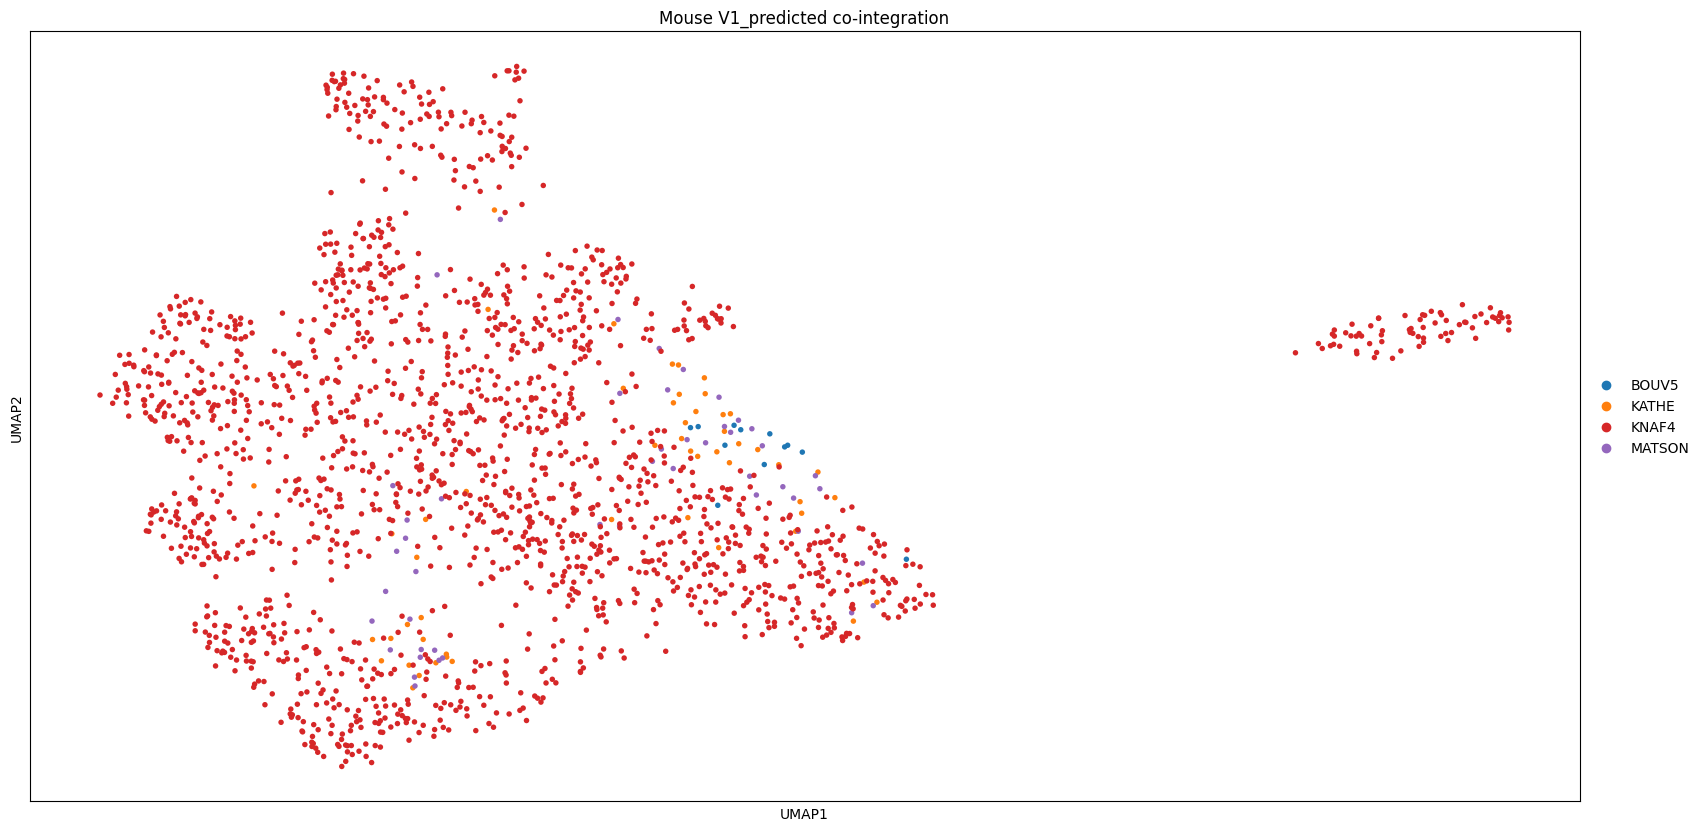

In [141]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
sc.pl.umap(V1, color='orig.ident', ax = ax, title = 'Mouse V1_predicted co-integration')

In [181]:
from sklearn.cluster import AgglomerativeClustering
X = V1.X


clustering = AgglomerativeClustering(n_clusters=5).fit(X)

print(clustering.labels_)

[3 3 3 ... 0 0 4]


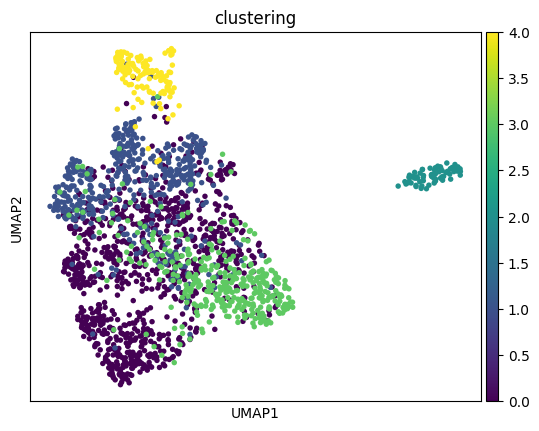

In [182]:
# Plot this clustering

V1.obs['clustering'] = clustering.labels_
sc.pl.umap(V1, color='clustering')

In [146]:
Z = hierarchy.linkage(V1.X, 'ward')


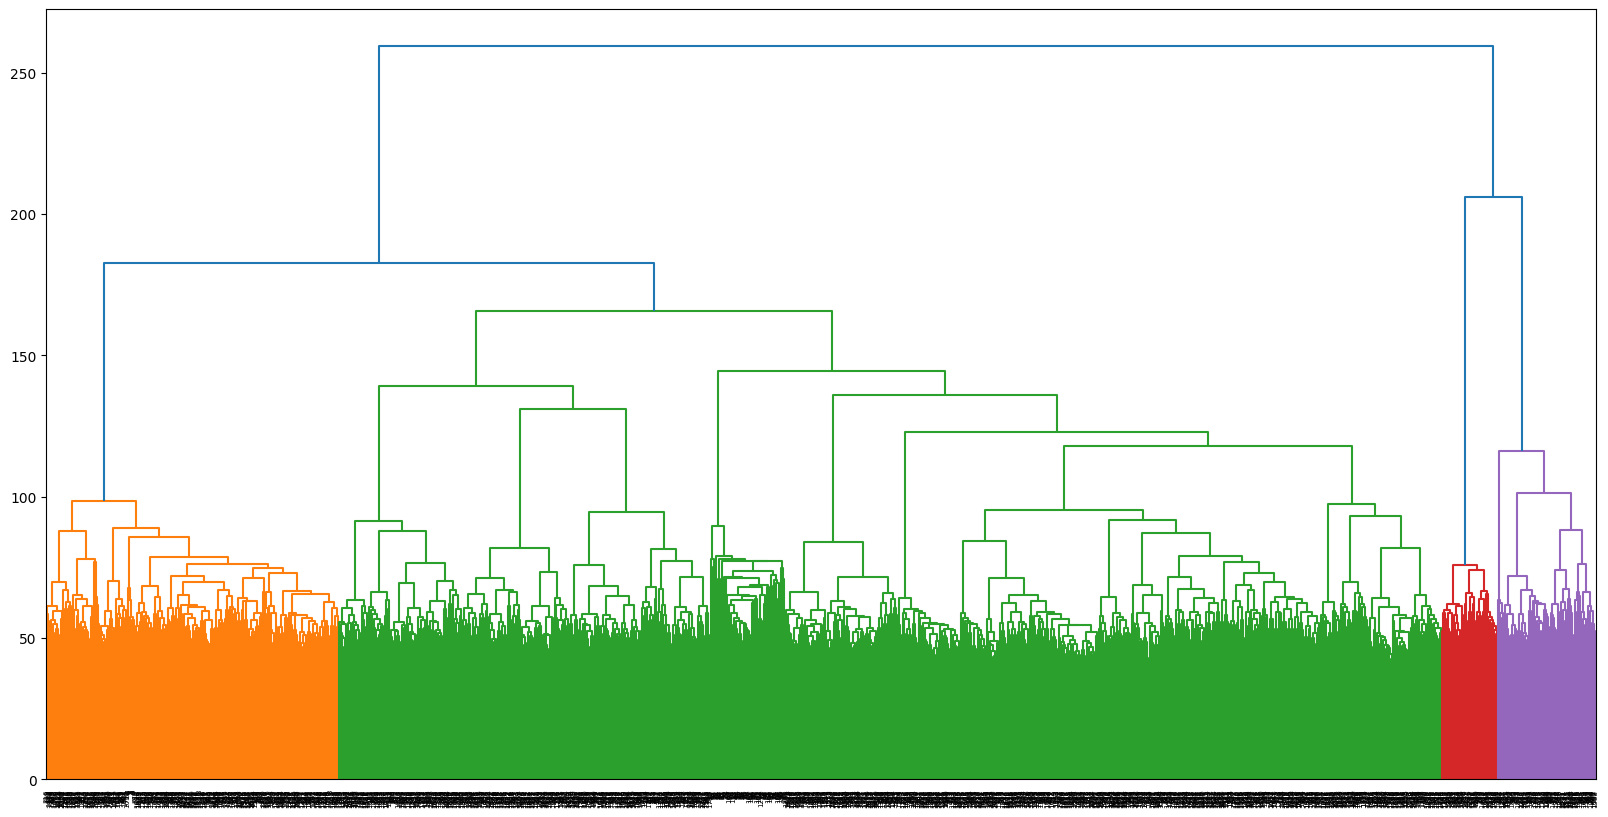

In [147]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
d = hierarchy.dendrogram(Z)

In [148]:
d.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list', 'leaves_color_list'])

In [149]:
len(d['leaves'])

1932

In [150]:
order = {}
for i in range(len(d['leaves'])):
    order[d['leaves'][i]] = d['leaves_color_list'][i]


In [151]:
res = {key: val for key, val in sorted(order.items(), key = lambda ele: ele[0])}
order = res

In [152]:
np.unique(d['leaves_color_list'])

array(['C1', 'C2', 'C3', 'C4'], dtype='<U2')

In [153]:
len(d['leaves_color_list'])

1932

In [154]:
V1.uns['divise_clusters_colors'] = ['orange', 'green', 'red', 'violet']

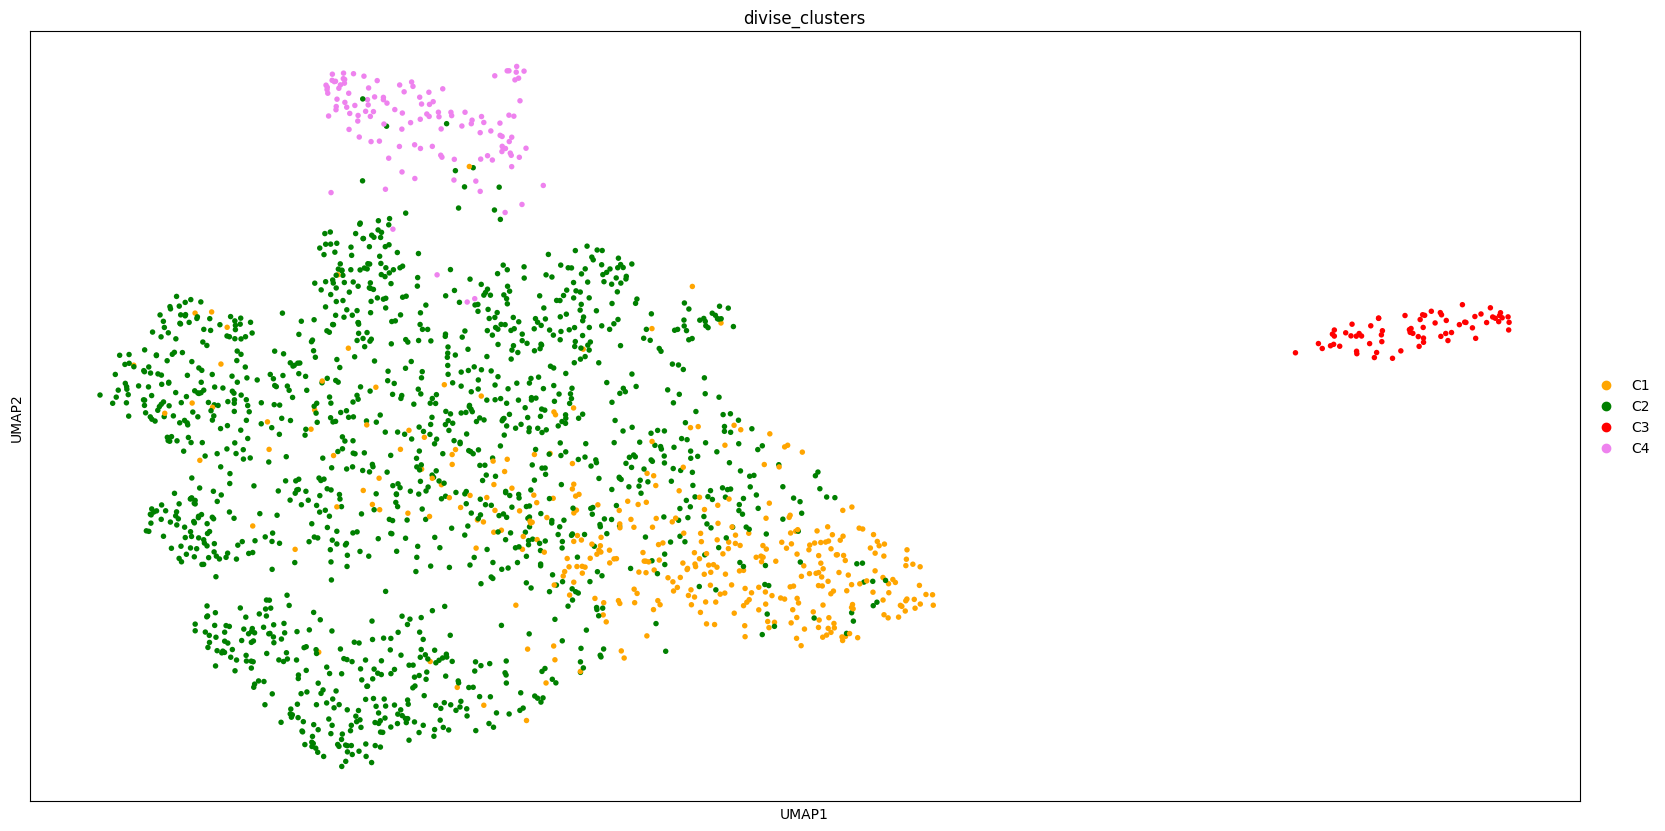

In [155]:
V1.obs['divise_clusters'] = order.values()
fig, ax = plt.subplots(1,1, figsize = (20,10))
sc.pl.umap(V1, color = 'divise_clusters', ax =ax)

In [156]:
# Explore marker representation in these clusters
mouse_counts = sc.read_h5ad('seu.h5ad')

In [157]:
mouse_counts.obs['v1'] = mouse_annotation.obs['v1']

In [158]:
mouse_counts = mouse_counts[mouse_counts.obs['v1'].notna()]

In [159]:
V1_counts = mouse_counts[mouse_counts.obs['v1'] == 'V1']
V1_counts

View of AnnData object with n_obs × n_vars = 1932 × 32760
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'doublet_finder', 'percent_mito', 'keep', 'nCount_SCT', 'nFeature_SCT', 'GFP', 'seurat_clusters', 'celltype', 'v1'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [160]:
V1_counts.obs['divise_clusters'] = V1.obs['divise_clusters']

C:\Users\Emile\AppData\Local\Temp\ipykernel_25192\2717641760.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  V1_counts.obs['divise_clusters'] = V1.obs['divise_clusters']


In [161]:
sc.pp.log1p(V1_counts, copy=False)

In [162]:
sc.tl.rank_genes_groups(V1_counts, groupby='divise_clusters', method = 'wilcoxon', tie_correct=True)

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (


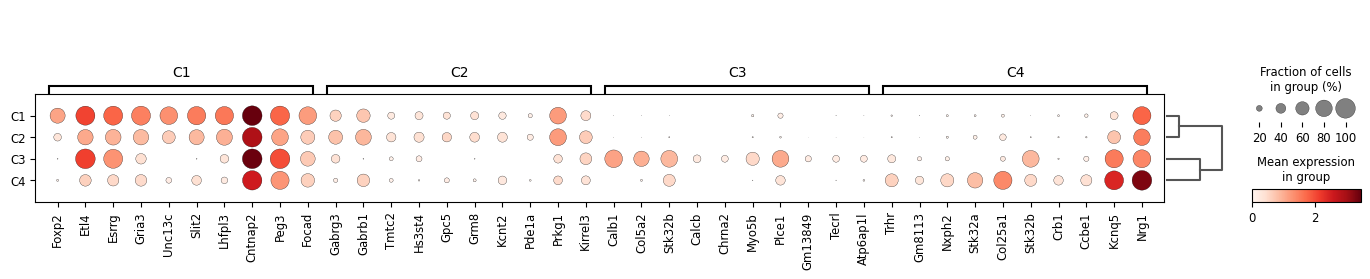

In [163]:
sc.pl.rank_genes_groups_dotplot(V1_counts)

In [183]:
V1_counts.obs['agglo_clusters'] = V1.obs['clustering'].apply(lambda x : str(x))

In [184]:
V1.obs['clustering'] = V1.obs['clustering'].astype('category')

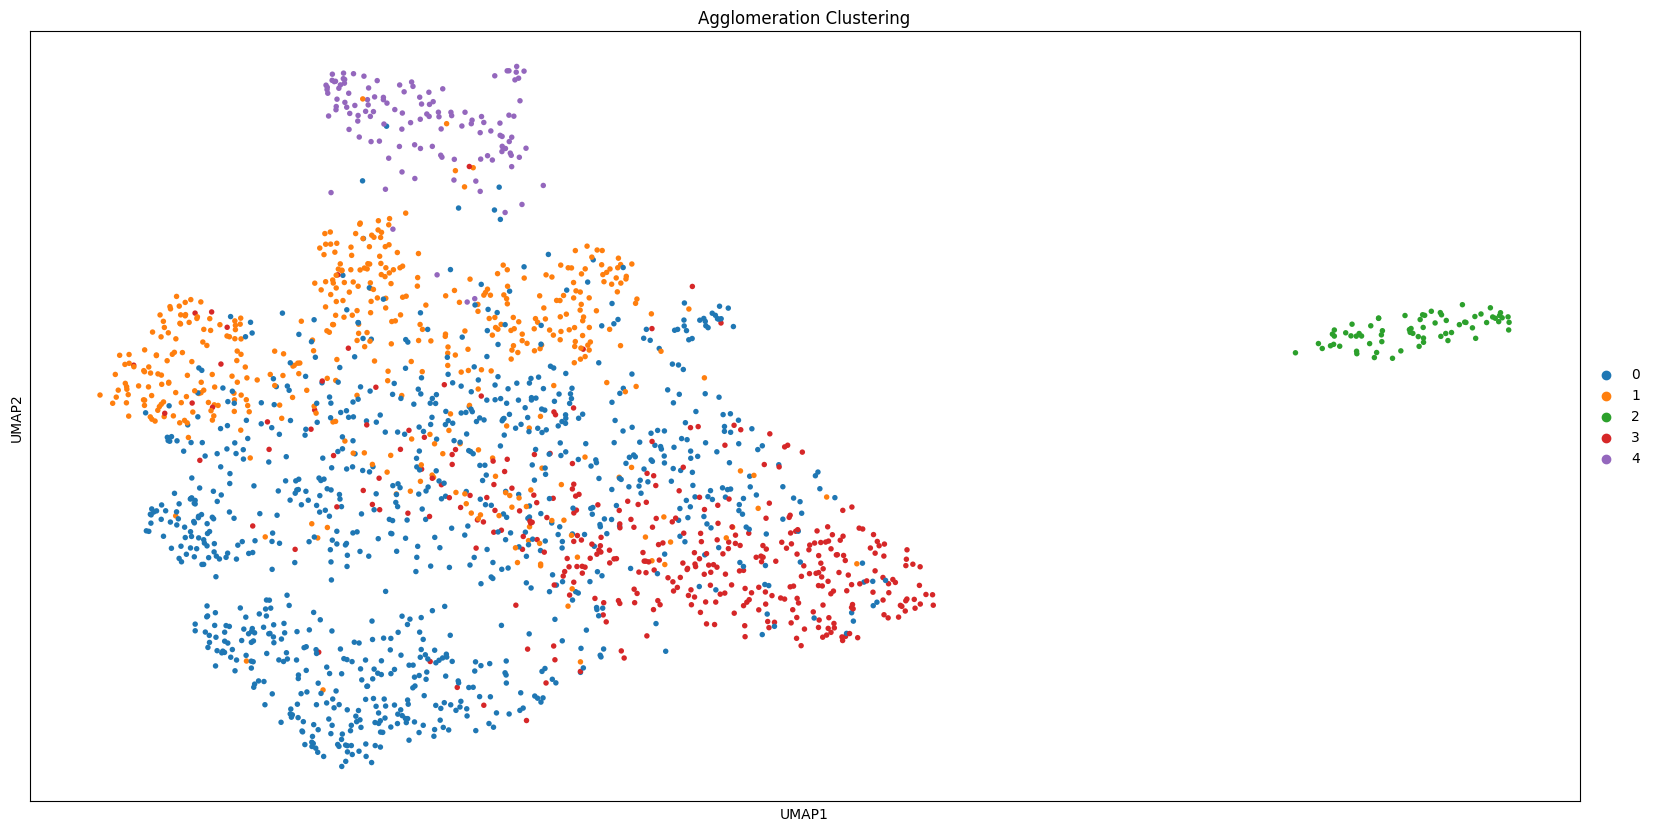

In [192]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
sc.pl.umap(V1, color='clustering', title='Agglomeration Clustering', ax =ax)

In [186]:
V1_counts.obs['agglo_clusters'] = V1_counts.obs['agglo_clusters'].astype('category')

In [187]:
sc.tl.dendrogram(V1_counts, groupby='agglo_clusters')

In [188]:
sc.tl.rank_genes_groups(V1_counts, groupby='agglo_clusters', method = 'wilcoxon', tie_correct=True)

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (


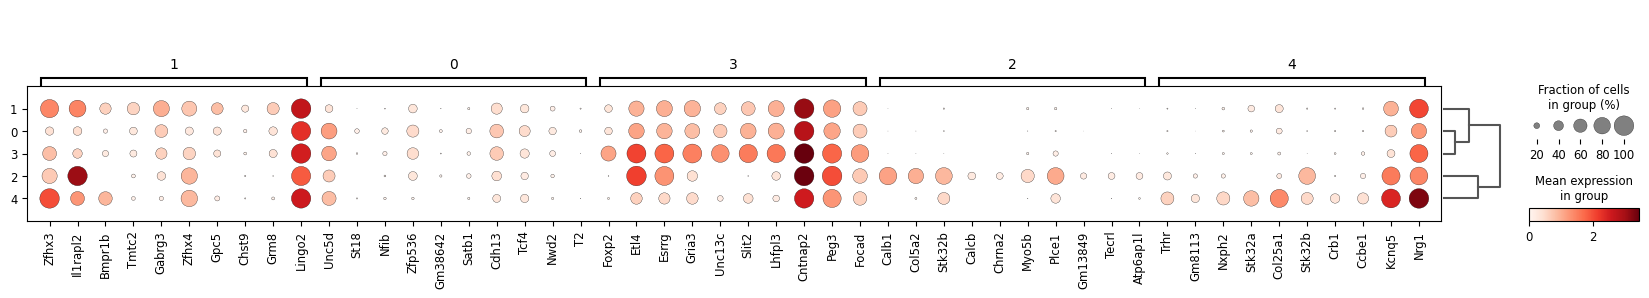

In [189]:
sc.pl.rank_genes_groups_dotplot(V1_counts)

# Human Clustering

In [195]:
human_annotation_file = 'human_neurons_annotated_xgb_allgenes.h5ad'
human_annotation = sc.read_h5ad(human_annotation_file)
human_annotation

AnnData object with n_obs × n_vars = 18157 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'RNA_snn_res.2', 'seurat_clusters', 'training_labels', 'labels_xgb', 'annotation', 'predicted_labels_xgb', 'predicted_labels_svm', 'predicted_labels_knn', 'predicted_annotation'
    var: 'vf_vst_counts.BOUV5_mean', 'vf_vst_counts.BOUV5_variance', 'vf_vst_counts.BOUV5_variance.expected', 'vf_vst_counts.BOUV5_variance.standardized', 'vf_vst_counts.BOUV5_variable', 'vf_vst_counts.BOUV5_rank', 'vf_vst_counts.KNAF3_mean', 'vf_vst_counts.KNAF3_variance', 'vf_vst_counts.KNAF3_variance.expected', 'vf_vst_counts.KNAF3_variance.standardized', 'vf_vst_counts.KNAF3_variable', 'vf_vst_counts.KNAF3_rank', 'vf_vst_counts.KNAF4_mean', 'vf_vst_counts.KNAF4_variance', 'vf_vst_counts.KNAF4_variance.expected', 'vf_vst_counts.KNAF4_variance.standardized', 'vf_vst_counts.KNAF4_variable', 'vf_vst_counts.KNAF4_rank', 'vf_vst_counts.BOUV6_mean', 'vf_vst_counts.BOUV6_variance', 'vf_vst_counts.BOUV6_

In [196]:
human_annotation = human_annotation[human_annotation.obs['species'] == 'human']

In [197]:
human_annotation.obs['predicted_annotation'].value_counts()

predicted_annotation
Not_V1_predicted    11519
V1_predicted          136
Name: count, dtype: int64

In [198]:
V1_human = human_annotation[human_annotation.obs['predicted_annotation'] == 'V1_predicted']
V1_human

View of AnnData object with n_obs × n_vars = 136 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'RNA_snn_res.2', 'seurat_clusters', 'training_labels', 'labels_xgb', 'annotation', 'predicted_labels_xgb', 'predicted_labels_svm', 'predicted_labels_knn', 'predicted_annotation'
    var: 'vf_vst_counts.BOUV5_mean', 'vf_vst_counts.BOUV5_variance', 'vf_vst_counts.BOUV5_variance.expected', 'vf_vst_counts.BOUV5_variance.standardized', 'vf_vst_counts.BOUV5_variable', 'vf_vst_counts.BOUV5_rank', 'vf_vst_counts.KNAF3_mean', 'vf_vst_counts.KNAF3_variance', 'vf_vst_counts.KNAF3_variance.expected', 'vf_vst_counts.KNAF3_variance.standardized', 'vf_vst_counts.KNAF3_variable', 'vf_vst_counts.KNAF3_rank', 'vf_vst_counts.KNAF4_mean', 'vf_vst_counts.KNAF4_variance', 'vf_vst_counts.KNAF4_variance.expected', 'vf_vst_counts.KNAF4_variance.standardized', 'vf_vst_counts.KNAF4_variable', 'vf_vst_counts.KNAF4_rank', 'vf_vst_counts.BOUV6_mean', 'vf_vst_counts.BOUV6_variance', 'vf_vst_counts.

In [199]:
sc.neighbors.neighbors(V1_human, use_rep='X_rpca')

In [200]:
sc.tl.umap(V1_human)

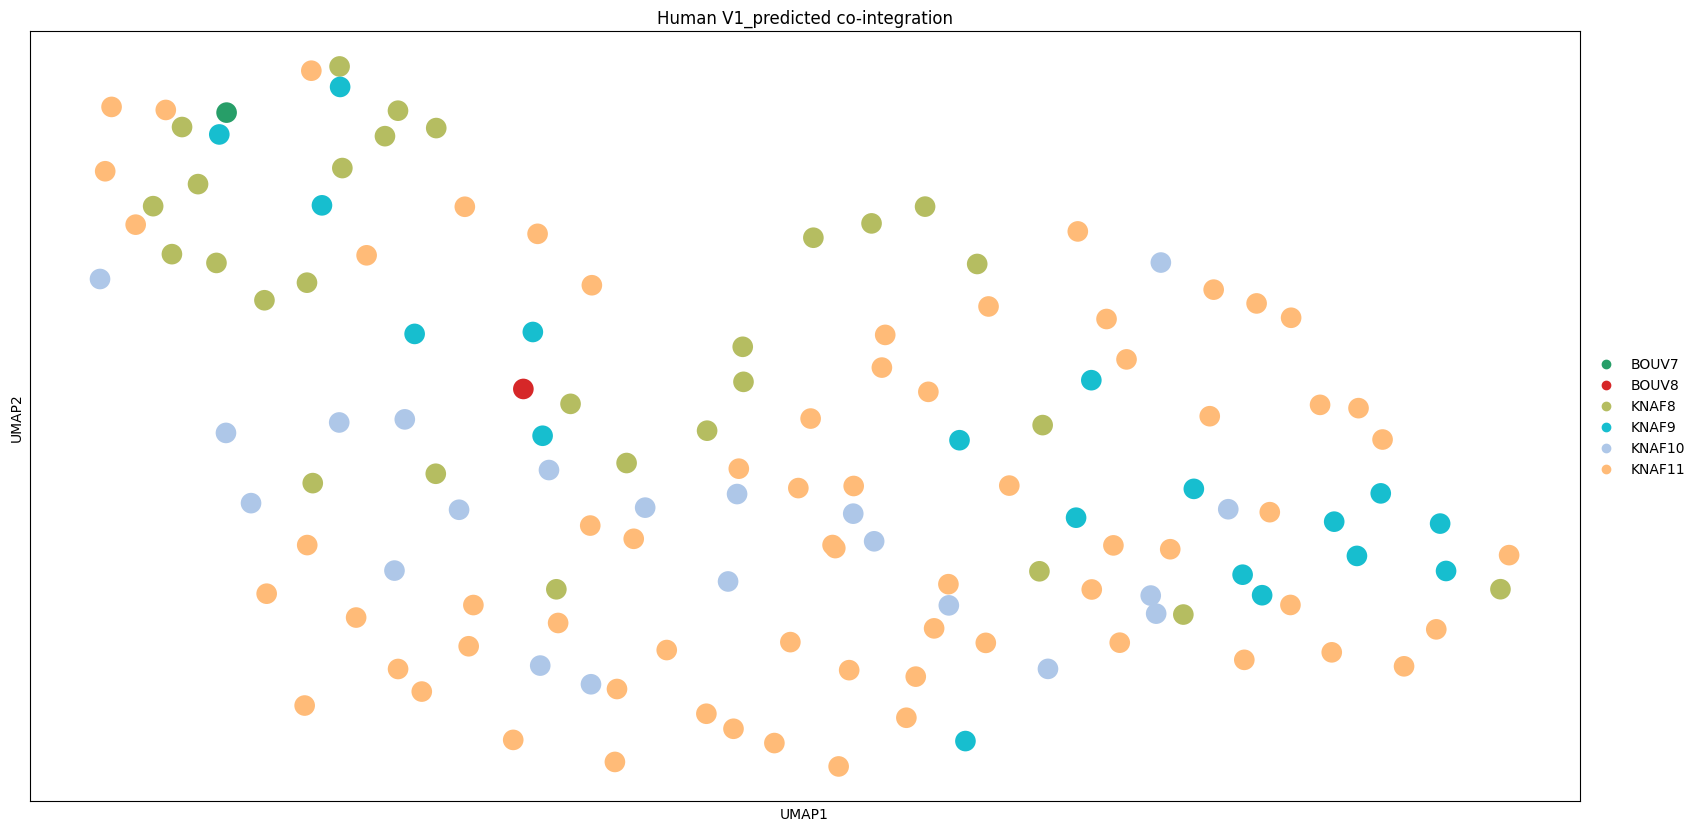

In [201]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
sc.pl.umap(V1_human, color = 'orig.ident', ax=ax, title='Human V1_predicted co-integration')

In [202]:
Z = hierarchy.linkage(V1_human.X, 'ward')

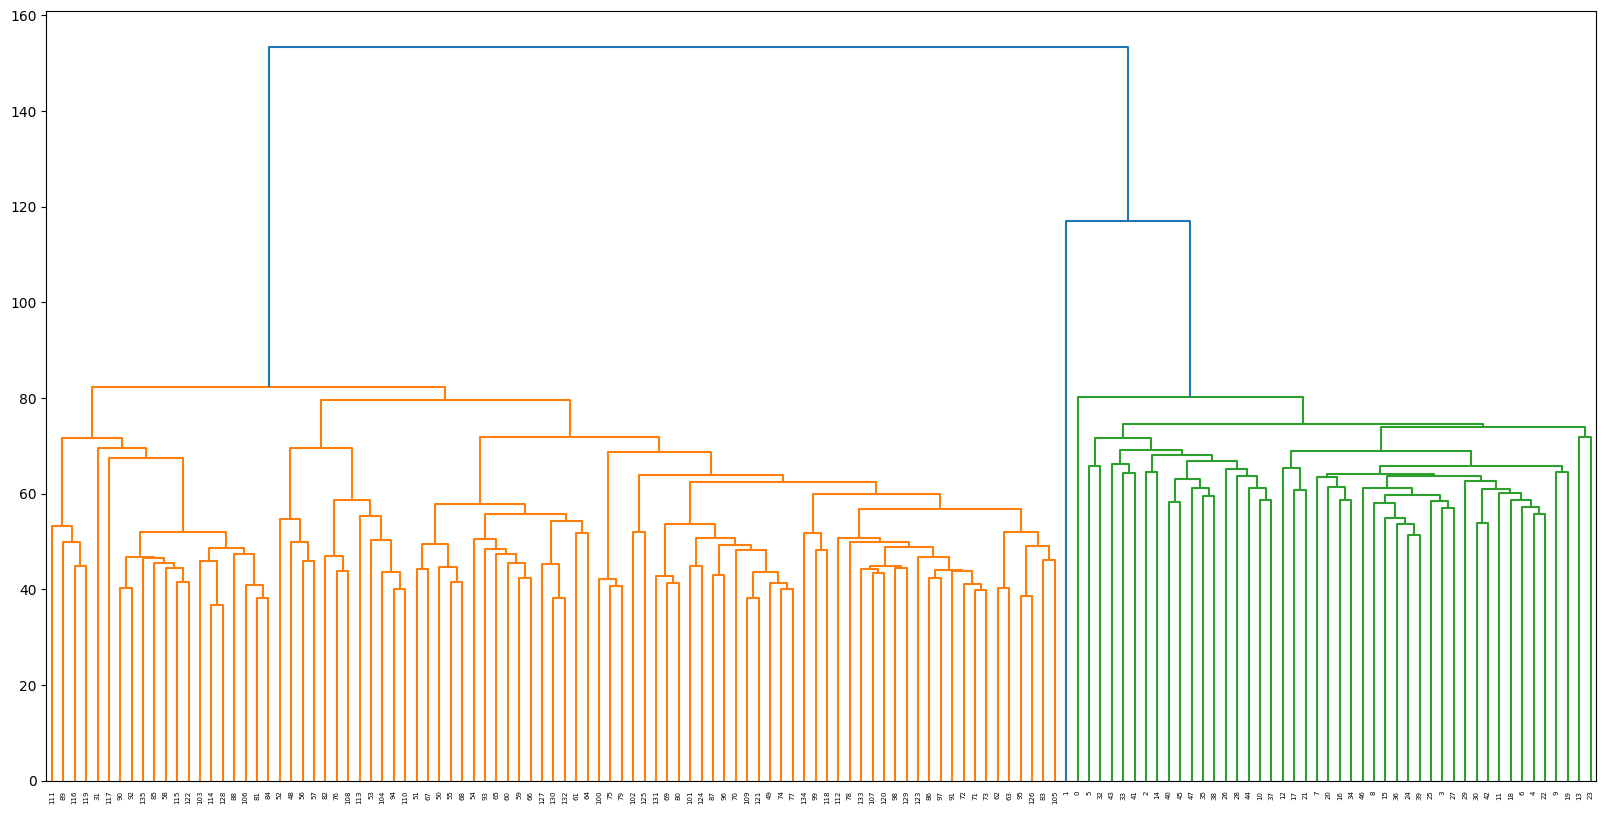

In [203]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
d = hierarchy.dendrogram(Z)

In [204]:
order = {}
for i in range(len(d['leaves'])):
    order[d['leaves'][i]] = d['leaves_color_list'][i]

In [205]:
res = {key: val for key, val in sorted(order.items(), key = lambda ele: ele[0])}
order = res

In [206]:
np.unique(d['leaves_color_list'])

array(['C0', 'C1', 'C2'], dtype='<U2')

In [207]:
len(d['leaves_color_list'])

136

In [208]:
V1_human.obs['divise_clusters'] = order.values()

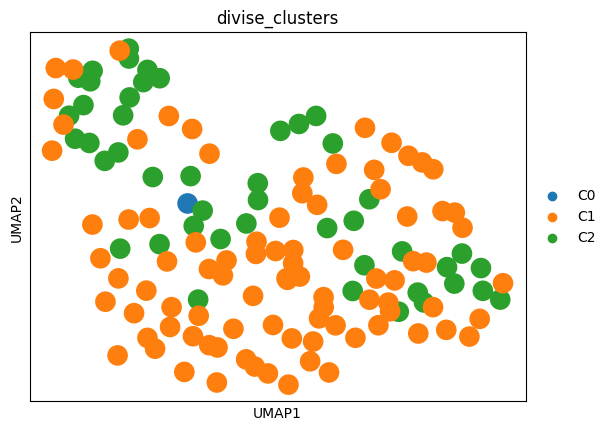

In [209]:
sc.pl.umap(V1_human, color = 'divise_clusters')

In [210]:
V1_human = V1_human[V1_human.obs['divise_clusters'] != 'C0']

In [211]:
human_counts = sc.read_h5ad("human_neurons_counts.h5ad")
human_counts.obs['annotation'] = V1_human.obs['predicted_annotation']

In [212]:
human_counts = human_counts[human_counts.obs['annotation'].notna()]
human_counts

View of AnnData object with n_obs × n_vars = 135 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'doublet_finder', 'percent_mito', 'keep', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.01', 'seurat_clusters', 'celltype', 'SCT_snn_res.0.05', 'annotation'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [213]:
human_counts.obs['divise_clusters'] = V1_human.obs['divise_clusters']

C:\Users\Emile\AppData\Local\Temp\ipykernel_25192\2881673657.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  human_counts.obs['divise_clusters'] = V1_human.obs['divise_clusters']


In [214]:
sc.pp.log1p(human_counts)

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (


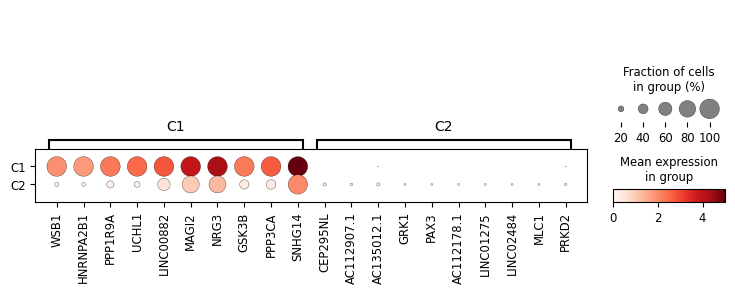

In [215]:
sc.tl.rank_genes_groups(human_counts, groupby='divise_clusters', method = 'wilcoxon', tie_correct=True)
sc.tl.filter_rank_genes_groups(human_counts, min_fold_change=3)
sc.pl.rank_genes_groups_dotplot(human_counts)

In [240]:
from sklearn.cluster import AgglomerativeClustering
X = V1_human.X


clustering = AgglomerativeClustering(n_clusters=5, compute_distances=True, compute_full_tree=True).fit(X)

print(clustering.labels_)

[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 4 1 1 1 4 4 1 1 4 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 4 1 1 1 1 2 4 1 2 2 1 1 2 2 2 1 2 1 4 1 1 1 1 1 1 1 1 2 4 1 2 1 4 1 4 2
 1 4 2 2 2 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2]


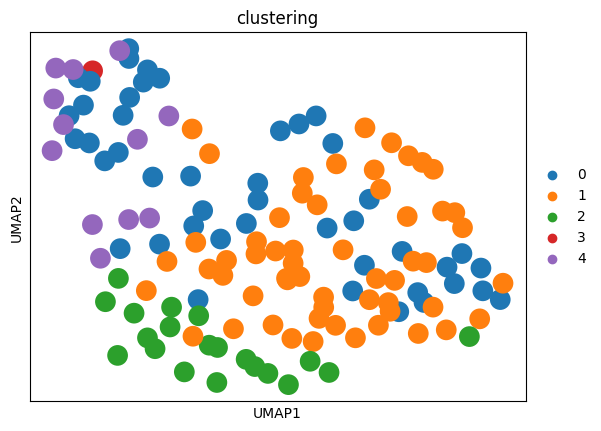

In [241]:
# Plot this clustering

V1_human.obs['clustering'] = clustering.labels_
V1_human.obs['clustering'] = V1_human.obs['clustering'].astype('str')
V1_human.obs['clustering'] = V1_human.obs['clustering'].astype('category')
sc.pl.umap(V1_human, color='clustering')

In [246]:
V1_human = V1_human[V1_human.obs['clustering'] != '3']

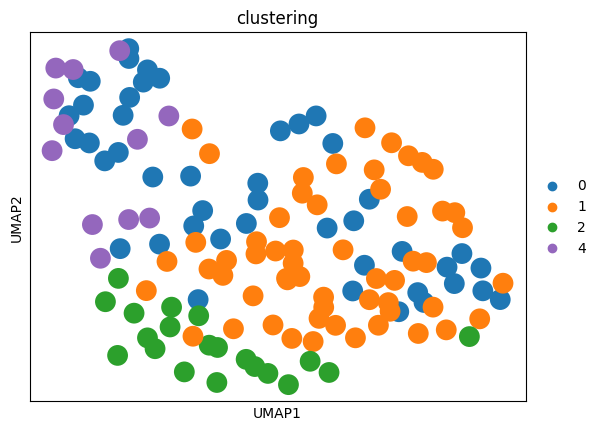

In [247]:
sc.pl.umap(V1_human, color='clustering')

In [242]:
human_counts.obs['agglo_clusters'] = V1_human.obs['clustering']

In [243]:
human_counts = human_counts[human_counts.obs['agglo_clusters'] != '3']

In [244]:
sc.tl.dendrogram(human_counts, groupby='agglo_clusters')

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_dendrogram.py:195: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = dat


c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (


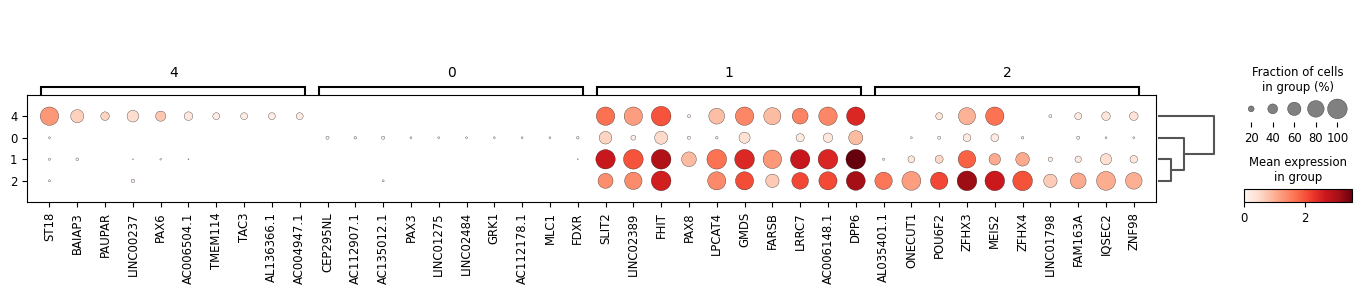

In [245]:
sc.tl.rank_genes_groups(human_counts, groupby='agglo_clusters', method = 'wilcoxon', tie_correct=True)
sc.tl.filter_rank_genes_groups(human_counts, min_fold_change=3)
sc.pl.rank_genes_groups_dotplot(human_counts)